In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("finance_liquor_sales.csv")
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-31797900035,2020-11-10,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726.0,POINT (-90.766126 41.509119),82.0,SCOTT,...,26858,Templeton 4YR Rye,12,375,9.99,14.99,1,14.99,0.37,0.09
1,INV-23548800092,2019-11-27,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51.0,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
2,INV-23609300026,2019-12-02,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82.0,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
3,INV-39482900037,2021-08-24,3719,Wal-Mart 0581 / Marshalltown,2802 S Center St,Marshalltown,50158.0,POINT (-92.91231 42.012918),64.0,MARSHALL,...,65259,Jagermeister Liqueur Mini Meisters,12,20,4.93,7.40,12,88.80,0.24,0.06
4,INV-39520400088,2021-08-25,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201.0,POINT (-95.854899 43.184242),71.0,OBRIEN,...,77487,Tortilla Gold DSS,12,1000,4.85,7.28,4,29.12,4.00,1.05


In [4]:
# Check For Missing Values
missing = df.isnull().sum()
print(missing)

invoice_and_item_number     0
date                        0
store_number                0
store_name                  0
address                     0
city                        0
zip_code                    0
store_location             18
county_number               1
county                      1
category                    3
category_name               9
vendor_number               0
vendor_name                 0
item_number                 0
item_description            0
pack                        0
bottle_volume_ml            0
state_bottle_cost           0
state_bottle_retail         0
bottles_sold                0
sale_dollars                0
volume_sold_liters          0
volume_sold_gallons         0
dtype: int64


In [23]:
#Convert the Date to Datetime / Filter the data to be between 2016 - 2019

df['date'] = pd.to_datetime(df['date'], errors ='coerce')
filtered_data = df[(df['date'] >= '2016-01-01') & (df['date'] <= '2019-12-31')]


In [24]:
# Most Popular Item in the Index
# The popularity is based on the bottles sold
pop_items = filtered_data.groupby(['zip_code','item_description'])['bottles_sold'].sum().reset_index()

In [25]:
most_pop_item = pop_items.loc[pop_items.groupby('zip_code')['bottles_sold'].idxmax()]

sorted_most_pop = most_pop_item.sort_values(by="bottles_sold",ascending = False).head(20)


In [26]:
# output
print("Most Popular Items Sold by Each Zip Code:\n", sorted_most_pop)

Most Popular Items Sold by Each Zip Code:
     zip_code                               item_description  bottles_sold
62   52314.0                                Juarez Gold Dss          1560
32   50702.0                              Tortilla Gold Dss           768
0    50010.0                       Member's Mark Spiced Rum           288
40   51106.0                          Kahlua Coffee Liqueur           240
11   50314.0                              Juarez Triple Sec           240
64   52402.0                           Montezuma Triple Sec           216
35   50703.0              Pinnacle Peach w/ Punch Dispenser           180
17   50320.0                        Di Amore Quattro Orange           120
24   50501.0                                    Titos Vodka           108
2    50111.0                     Saints N Sinners Apple Pie           108
20   50327.0                           Bacardi Gold Rum PET           102
9    50266.0  Avion Silver w/Powell & Mahoney Margarita Mix          

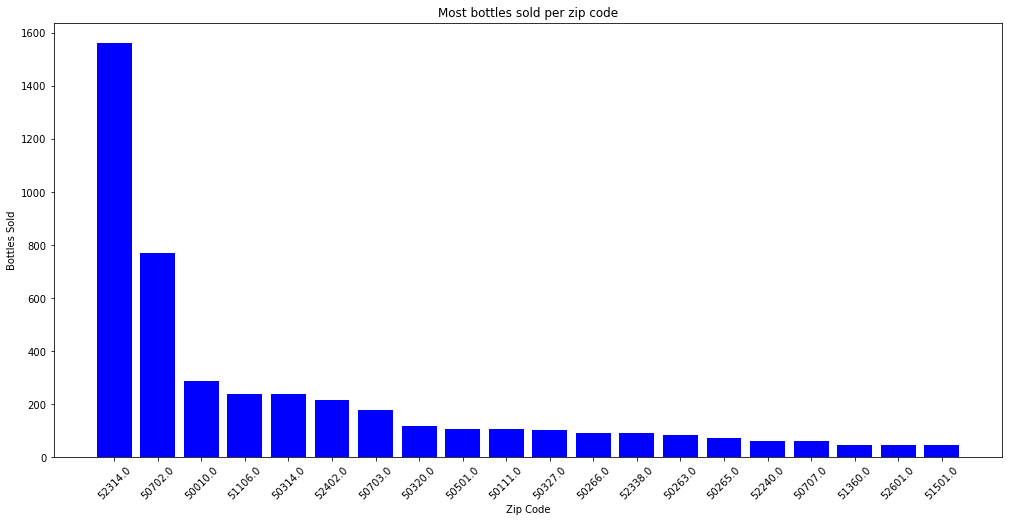

In [27]:
# Plot
plt.figure(figsize=(17,8))
plt.bar(sorted_most_pop["zip_code"].astype(str), sorted_most_pop["bottles_sold"], color="Blue")
plt.xlabel("Zip Code")
plt.ylabel("Bottles Sold")
plt.title("Most bottles sold per zip code")
plt.xticks(rotation=45)
plt.show()

In [29]:
# Total Sales in dollars 

tot_sales = filtered_data['sale_dollars'].sum()
store_sales = filtered_data.groupby('store_name')['sale_dollars'].sum().reset_index()
store_sales['sales_percentage'] = (store_sales['sale_dollars'] / tot_sales ) * 100

print("Total Sales \n",store_sales)


Total Sales 
                            store_name  sale_dollars  sales_percentage
0           Bootleggin' Barzini's Fin          6.75          0.010574
1                    Burlington Shell        206.64          0.323693
2   CVS Pharmacy #8526 / Cedar Rapids         42.00          0.065791
3               Cedar Ridge Vineyards       3712.50          5.815478
4                      Central City 2       2580.60          4.042403
..                                ...           ...               ...
59                  Speedy Gas N Shop         68.18          0.106801
60             Tequila's Liquor Store        413.28          0.647386
61    The Ox & Wren Spirits and Gifts         75.12          0.117672
62   Tobacco Hut #14 / Council Bluffs         33.24          0.052069
63                     Wilkie Liquors      11620.80         18.203504

[64 rows x 3 columns]


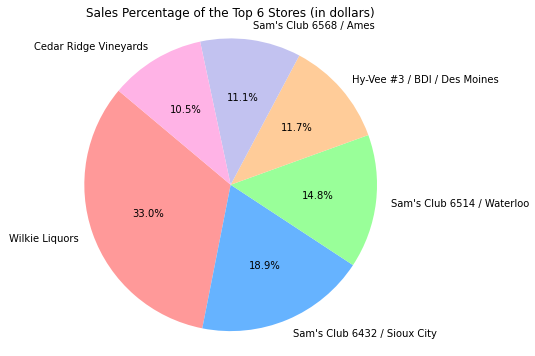

In [34]:
# Plot for the top 6 stores

sorted_stores = store_sales.sort_values(by="sale_dollars",ascending = False)

top_6_stores = sorted_stores.head(6)

plt.figure(figsize=(8, 6))
plt.pie(top_6_stores['sales_percentage'], labels=top_6_stores['store_name'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Sales Percentage of the Top 6 Stores (in dollars)')
plt.axis('equal')  
plt.show()


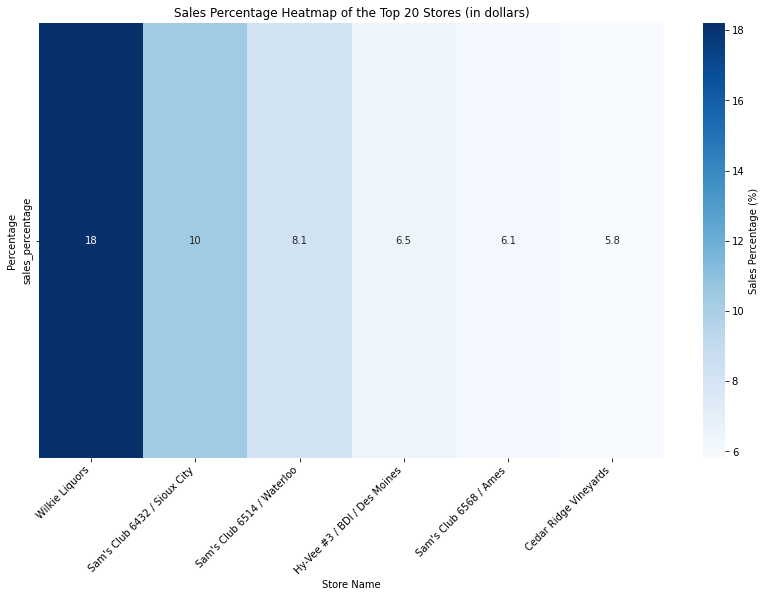

In [35]:
# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(top_6_stores[['sales_percentage']].set_index(top_6_stores['store_name']).T, 
            annot=True, cmap='Blues', cbar_kws={'label': 'Sales Percentage (%)'})

plt.title('Sales Percentage Heatmap of the Top 20 Stores (in dollars)')
plt.xlabel('Store Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()